In [1]:
import numpy as np

In [2]:
from qiskit import BasicAer, transpile

# Function to simulate states after measurements

# Defining the necessary backend (in our case, a simulator, not a real device)
backend = BasicAer.get_backend("statevector_simulator")

# Defining a function that obtains the statevector of a quantum circuit
def Simulate_StateVector(q_circuit):
    tqc = transpile(q_circuit, backend) # Transpiling circuit to be read by the backend
    job = backend.run(tqc) # Telling backend to read the circuit
    result = job.result() # Getting outputs from backend
    statevector = result.get_statevector(tqc, 4) # Selecting the statevector output
    return statevector # Returning circuit statevector

In [3]:
from qiskit.opflow import I, X, Y, Z

# Constructing hamiltonian and time evolution operators

# Coupling constants
J_1 = -2.0
J_2 = -2.0

# Time between consecutive measurements
evolution_time = np.pi/5

# Operators
H = - (J_1/2) * (I ^ X ^ X) - (J_2/2) * (Z ^ Z ^ I) # Hamiltonian
U = (evolution_time*H).exp_i() # Time-evolution

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Number of qubits in the circuit
num_qubits = 3

# Executing time-evolutions and measurements

# Number of trajectories and steps
num_trajectories = 1 # Number of times the measurement process will be repeated
num_steps = 10 # Number of steps for each trejectory

# Array to store mean energies over all trajectories
Final_energies = np.zeros(num_steps + 1)

# Qubit to be measured
measured_qubit = 0

for trajectory in range(num_trajectories):
    
    if trajectory%100 == 0: print(trajectory)
    
    # Creating a circuit of N qubits and 1 cbit to store measurements
    qc = QuantumCircuit(num_qubits, num_qubits)
    
    # Array to store energies
    Energies = list([])

    # Appending initial energy
    psi = Simulate_StateVector(qc) # Getting the state array of the system after measurement
    psi = Statevector(psi) # Converting state array to qiskit.quantum_info Statevector class
    expectation_H = psi.expectation_value(H) # Expectation value of H
    Energies.append(np.real(expectation_H)) # Appending E to array 'Energies'

    # Evolutions and measurements
    for step in range(num_steps):
        qc.unitary(U, range(num_qubits), label = 'U') # Evolving the system
        qc.measure(measured_qubit, measured_qubit) # Measuring qubit 1
        psi = Simulate_StateVector(qc) # Getting the state array of the system after measurement
        psi = Statevector(psi) # Converting state array to qiskit.quantum_info Statevector class
        expectation_H = psi.expectation_value(H) # Expectation value of H
        Energies.append(np.real(expectation_H)) # Appending E to array 'Energies'

    for step in range(num_steps + 1):
        Final_energies[step] += Energies[step] # Summing energy values of this trajectory to 'Final_energies' array

# Calculating mean energies after all trajectories
Final_energies /= num_trajectories

0


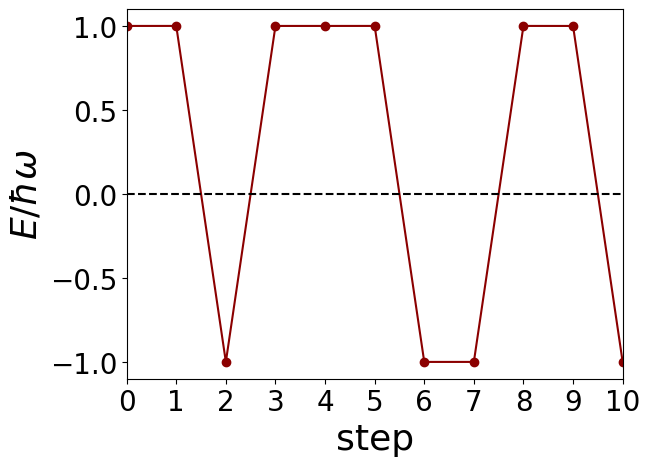

In [13]:
from matplotlib.pyplot import plot, show, xlim, ylim, xlabel, ylabel, title, savefig, xticks, yticks

# Saving data into a file
FILE = open("%i trajectories, "%num_trajectories + "T = %.2f"%evolution_time + ".txt", "w")

for i in range(len(Final_energies)):
    FILE.write("%.5f\n"%Final_energies[i])
    
FILE.close()

# Plotting results with matplotlib

plot(range(num_steps+1), Final_energies, marker = 'o', color = 'darkred') # Making a plot of num_qubits x Energy
plot(range(num_steps+1), np.zeros(num_steps+1), linestyle = 'dashed', color = 'black') # Reference line in y = 0

# Changing plot style
xlim(0,num_steps) # Limiting the x-range of the plot
#ylim(-1.1,1.1) # Limiting the y-range of the plot
xlabel(r'step', size = 26) # Labeling the x-axis
ylabel(r'$E/ \hbar\omega$', size = 26) # Labeling the y-axis
xticks(range(num_steps+1), size = 20)
yticks([-1.0, -0.5, 0.0, 0.50, 1.0], size = 20)
#title("%i"%num_trajectories + " Trajectories," + r"   $J_1 = $%.1f,"%J_1 + r"   $J_2 = $%.1f,"%J_2 + r"   $T = $%.3f"%evolution_time ) # Titling the plot

# Saving plot
savefig("%i trajectories, "%num_trajectories + "T = %.2f"%evolution_time + ".png", bbox_inches='tight', dpi = 500)

show() # Displaying the plot